<a href="https://colab.research.google.com/github/PKpacheco/pca-assignment4-uml/blob/main/Assignment_4_UML_PCA_v1_Paola_Pacheco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 - Unsupervised Machine Learning - PCA

Paola Katherine Pacheco - 0374446


## Question 1 - Data
Copy the relevant section from your notebook for assignment 2. The steps here are included for reference but are not worth marks.


In [1]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [2]:

# associate the url to the object csv_file and using pandas to read the file
df_github_url = "https://raw.githubusercontent.com/PKpacheco/uml-assignment2/main/CC%20GENERAL.csv"
df = pd.read_csv(df_github_url)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
# get some info from the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# read the first lines to undestand the csv, read the header
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
# using the descrube to summarize the data
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Quantitative description
`Balance` has a minimum of 0 and max of 19043,13, indicate that we will work with a huge range of different economic situation. Same happen with `credit_limit` we can see some customers have 50 and others 30,000, people with high limit are people that are good payers.


`Purchases` and `onoff_purchase` both have high standard deviation, means that it's a huge range in the purchase amount.


`cash_advance` the maximum it's super high, I beleie people use a lot of cash advance.


For `tenure` we can measure that almost all customers have credit card for 12 months, they have this card for the maxium 1 year.


If we compare purchases with one_off and installments, we can notice that 592.437371 is the average amount for one off, if the customer buy in a installments the value is less, 411.067645.

## Column description

This is a dataset that informs the behavior of people who own credit cards
Below a brief description for the columns


**CUST_ID** : Identification of Credit Card holder (Categorical)
\
**BALANCE** : Balance amount left in their account to make purchases \

**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) \

**PURCHASES** : Amount of purchases made from account \

**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go \

**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment \

**CASH_ADVANCE** : Cash in advance given by the user \

**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) \

**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) \

**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) \

**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid \

**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced" \

**PURCHASES_TRX** : Numbe of purchase transactions made \

**CREDIT_LIMIT** : Limit of Credit Card for user \

**PAYMENTS** : Amount of Payment done by user \

**MINIMUM_PAYMENTS** : Minimum amount of payments made by user \

**PRCFULLPAYMENT** : Percent of full payment paid by user \

**TENURE** : Tenure of credit card service for user \

In [6]:
# Check for duplicate rows
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [CUST_ID, BALANCE, BALANCE_FREQUENCY, PURCHASES, ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, TENURE]
Index: []


In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# Drop rows with missing values
df.dropna(inplace=True)

In [9]:
# check if the datatype are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

### ***Comments & Observations:***
\
After running the `info()`, I double-checked that all types are correct. I also checked for duplicate lines and `drop_duplicated` to make sure there is no duplicate data.Then I used `dropna` to remove the missing values


## Question 1 - c)

Drop the 'CUST_ID' column. Use seaborn.heatmap to display the correlation matrix of the features. Use seaborn.pairplot to generate scatter plots and histograms. Use markdown to make observations.


In [10]:
# create a new dataframe for the 'CUST_ID' column
cust_id_df = df[['CUST_ID']]
df.drop(columns=['CUST_ID'], inplace=True)

In [11]:
# double check the head of new dataframe
cust_id_df.head()

,CUST_ID
0,C10001
1,C10002
2,C10003
4,C10005
5,C10006


In [12]:
# double check the head of new dataframe column
cust_id_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CUST_ID  8636 non-null   object
dtypes: object(1)
memory usage: 134.9+ KB


<ipython-input-13-f533d3445fd8>:21: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(cor_matrix, dtype = np.bool))


<Axes: >

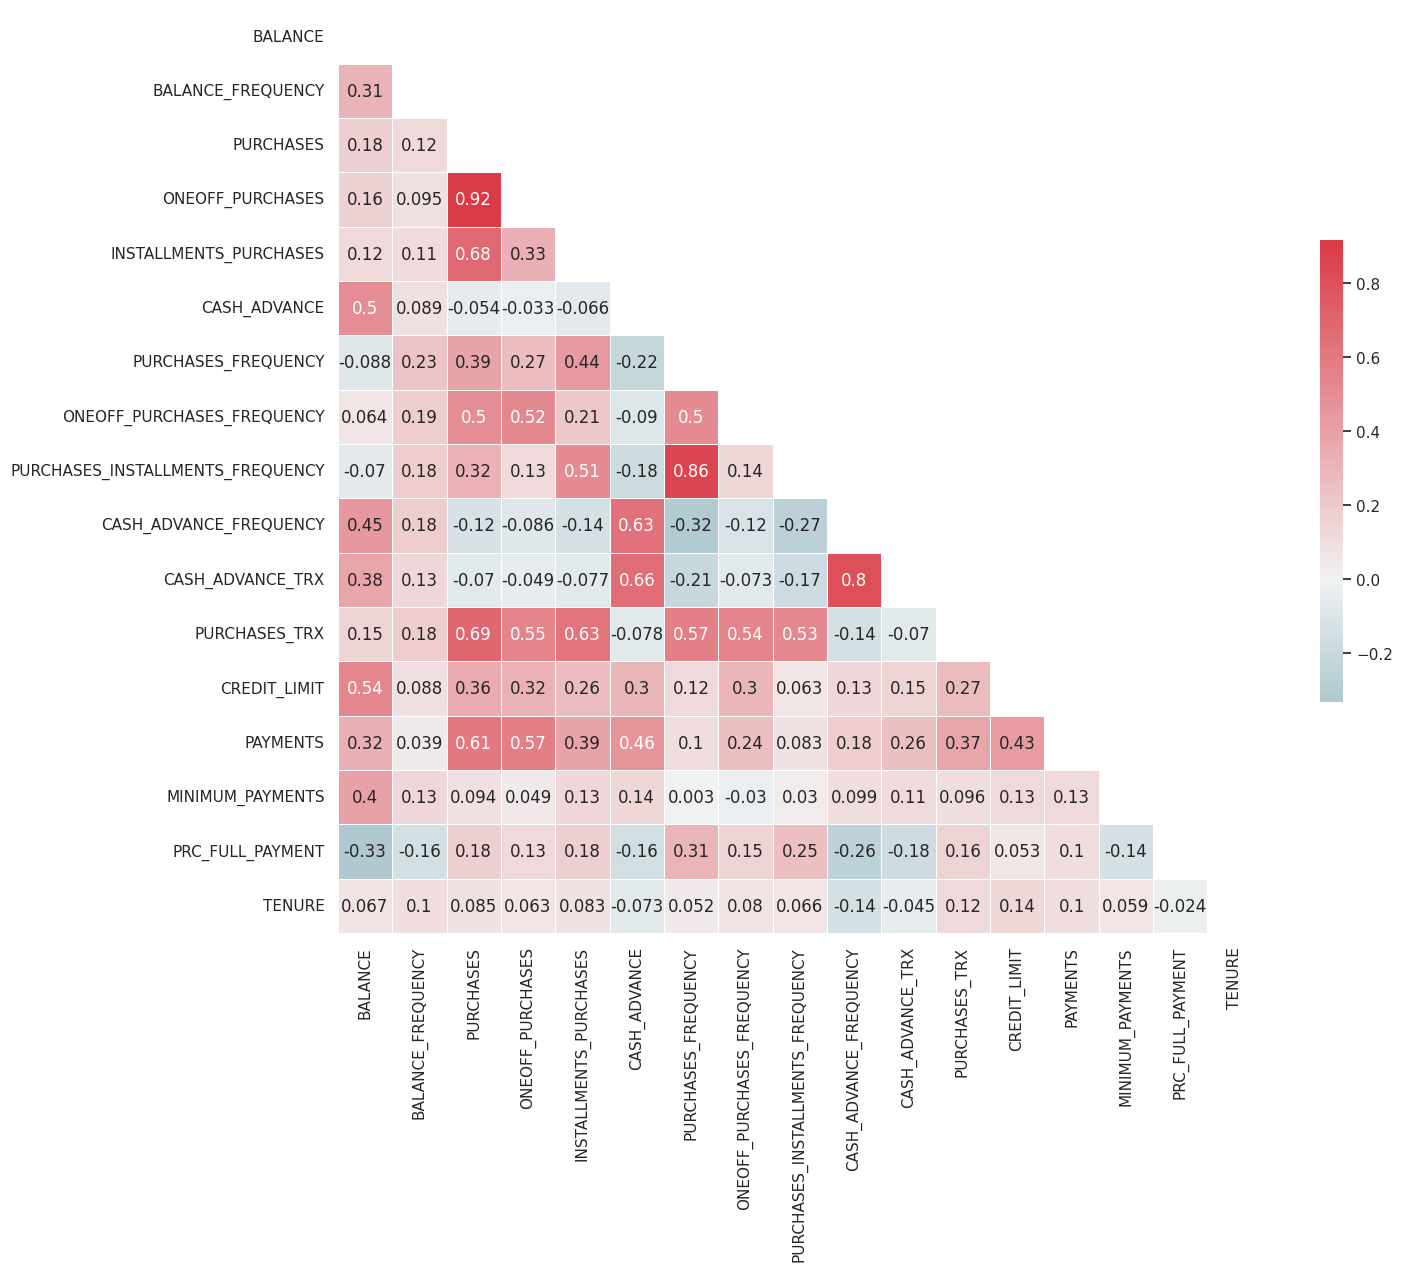

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# associate correlation dataframe to a variable
correlation_matrix = df.corr()

# # generate the heatmat using seaborn, change the color to coolwarm presset colors and add line to separate
# sns.heatmap(correlation_matrix,  cmap='RdBu_r', linewidths=1) # positive correlations are red and negative are blue, cool tones.
# # Create a title to correlation map
# plt.title('Correlation Matrix')
# # plot the heatmat
# plt.show()

# fancy way to generate a correlation matrix
sns.set(style = "white")
cor_matrix = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cor_matrix, dtype = np.bool))

plt.figure(figsize = (15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(correlation_matrix, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot=True)

In [14]:
# # # Generate scatter plots and histograms
# sns.pairplot(df)
# plt.show()

### ***Comments & Observations:***
\

I obseved in the heatmap positive correlations between
* One off purchases  - purchases
\
Apparently there is a relationship where customers who buy little in single purchases are customers who make more purchases.
It can be understood that they are more frequent customers over time, they are more loyal customers.loyal customers.


* Purchases installments frequency - purchase frequency
\
Apparently customers who use installment purchases tend to buy more, the more the customer buys in installments the more frequently they make purchases.

## Question 2 - a)
Use sklearn.preprocessing.MinMaxScaler to scale the data. Print the header.


Scaled the data to get a range from the variables

In [15]:
from sklearn.preprocessing import MinMaxScaler

# get the reader from df
header = df.columns

# init the StandardScaler
scaler = MinMaxScaler()

# Fit and transform the data using the scaler
scaled_data = scaler.fit_transform(df)

# create new df with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=header)

# print  header of the new scaled df
print(scaled_df.head())

    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.042940           1.000000   0.000326          0.000393   
4  0.095038           1.000000   0.027188          0.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                0.004240      0.000000             0.166667   
1                0.000000      0.136685             0.000000   
2                0.000000      0.000000             1.000000   
3                0.000000      0.000000             0.083333   
4                0.059257      0.000000             0.666667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000      

## Question 2 - b)
Use sklearn.decomposition.PCA.fit_transform to do a PCA transformation on the data without specifying the number of components. Print out the explained variance ratios and determine how many components to keep in order to have 95% of the explained variance ratio.


In [16]:
# init PCA with no num of componets
pca = PCA()

pca_data = pca.fit_transform(scaled_df)

# Print out the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_
print("Explained Variance Ratios:")
print(explained_variance_ratios)

cumulative_variance = explained_variance_ratios.cumsum()

n_components_for_95_variance = len(cumulative_variance[cumulative_variance < 0.95]) + 1

print(f"\nNumber of components to explain 95% of variance: {n_components_for_95_variance}")


Explained Variance Ratios:
[5.03955232e-01 1.41781755e-01 1.32912552e-01 7.34316479e-02
 5.71994024e-02 3.63920330e-02 1.86386577e-02 1.39294555e-02
 6.73272748e-03 5.71488704e-03 2.94774792e-03 1.93635861e-03
 1.31330333e-03 1.28409975e-03 1.10626151e-03 7.23844979e-04
 3.29000008e-08]

Number of components to explain 95% of variance: 7


## Question 2 - c)
Use sklearn.decomposition.PCA.fit_transform again to do a PCA transformation, this time setting n_components to keep 95% of the explained variance and save this to a new dataframe.


In [17]:
# Specify variance
expected_variance = 0.95

# Initialize PCA with the number of components to retain 95% of explained variance
pca = PCA(n_components=expected_variance)

# Fit and transform the data
pca_data = pca.fit_transform(scaled_df)

# Create a new DataFrame with the transformed data
pca_df = pd.DataFrame(data=pca_data)

# Check the shape of the new DataFrame
print(f"Shape of the new fd: {pca_df.shape}")


Shape of the new fd: (8636, 7)


In [18]:
# compare DF without PCA
print(f"Shape of the old df: {scaled_df.shape}")

Shape of the old df: (8636, 17)


## Question 3- a)
Create at least 12 different clustering models using k-means, hierarchical, and DBSCAN clustering; experiment with different choices of hyperparameters. Calculate the silhouette score for each model and tabulate the results.


In [19]:
# try to calculate number of clusters based on silhouette score
silhouete_scores = []
for i in range(2,20):
    HC_model = AgglomerativeClustering(n_clusters = i)
    HC_model.fit(scaled_df)
    silhouete_scores.append(round(silhouette_score(pca_df , HC_model.labels_),4))

print(silhouete_scores)

[0.3781, 0.3417, 0.2745, 0.2652, 0.2651, 0.2837, 0.2901, 0.3043, 0.2602, 0.2675, 0.2663, 0.2408, 0.2404, 0.2444, 0.2222, 0.2265, 0.2252, 0.2223]


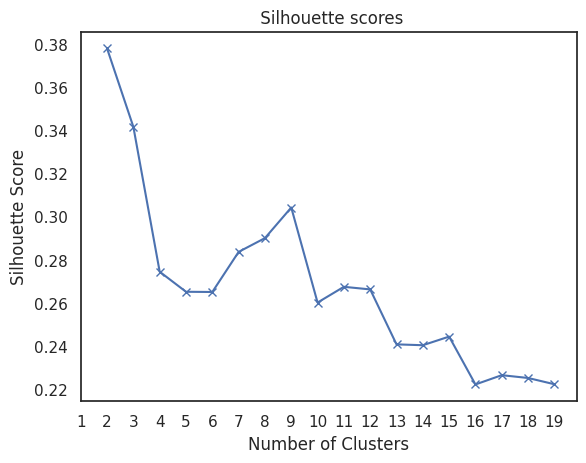

In [20]:
# plot the silhouette score
ax , fig = plt.subplots()
ax = plt.plot(range(2,20) , silhouete_scores , 'bx-')
plt.xticks(range(1,20,1))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title(" Silhouette scores")
plt.show()

Based on the silhouette score, the number of clusters is 4.

The highest silhouette score is 0.3781, so we can use 4 as a number of clusters

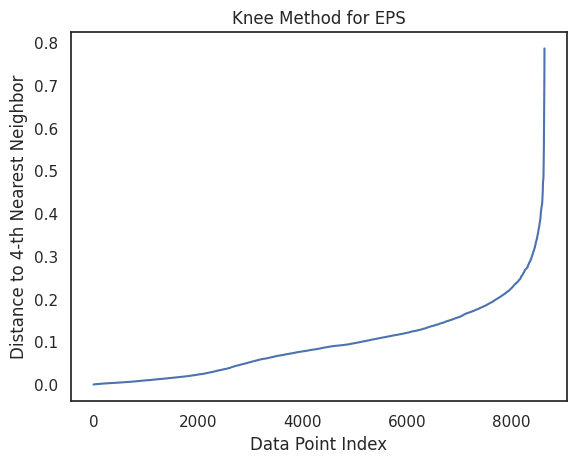

In [21]:
# Calculate distances to the k-nearest neighbors
k = 4
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(pca_df)
distances, _ = neigh.kneighbors(pca_df)

distances = np.sort(distances, axis=0)
plt.plot(distances[:, -1])
plt.xlabel("Data Point Index")
plt.ylabel("Distance to {}-th Nearest Neighbor".format(k))
plt.title("Knee Method for EPS")
plt.show()


Based on the plot we can see 0.8 as the highest number and it's our epsilon.

In [22]:
# # calculate min points in a dense region
# D - num of clumns (features)
D = len(pca_df.columns)

# use the rule of thumb
minPts = D + 1
minPts = max(minPts, 3)
print("Min Points according to the code is :", minPts)

Min Points according to the code is : 8


The min_points according to the code is 8

In [23]:
# kmeans hyperparameters
k_values = [ 3, 4, 7 ]

 # hierarchical clustering
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

# DBSCAN
eps_values = [0.4, 0.8, 1.0 ]
min_samples_values = [5,8, 12]
p_values = [1,2]



cluster_results = pd.DataFrame(columns=["Model", "Silhouette Score"])

# K-Means Clustering
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_df)
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    cluster_results = cluster_results.append({"Model": f"K-Means (k={k})", "Silhouette Score": silhouette_avg}, ignore_index=True)

# Hierarchical (Agglomerative) Clustering
for metric in metrics:
    for linkage in linkage_methods:
        for k in k_values:
            if linkage != 'ward' or metric == 'euclidean':
                hierarchical = AgglomerativeClustering(n_clusters=k, affinity=metric, linkage=linkage)
                cluster_labels = hierarchical.fit_predict(pca_df)
                silhouette_avg = silhouette_score(pca_df, cluster_labels)
                cluster_results = cluster_results.append({"Model": f"Agglomerative ({linkage}, k={k}, metric={metric})", "Silhouette Score": silhouette_avg}, ignore_index=True)

# DBSCAN Clustering
for eps in eps_values:
    for min_samples in min_samples_values:
        for p in p_values:  # Fix: Iterate over p_values
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', p=p)
            cluster_labels = dbscan.fit_predict(pca_df)
            # Check if DBSCAN found any clusters
            if len(set(cluster_labels)) > 1:
                silhouette_avg = silhouette_score(pca_df, cluster_labels)
                cluster_results = cluster_results.append({"Model": f"DBSCAN (eps={eps}, min_samples={min_samples}, p={p})", "Silhouette Score": silhouette_avg}, ignore_index=True)

# Display the results
print(cluster_results)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-23-1f92f3f88be8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_results = cluster_results.append({"Model": f"K-Means (k={k})", "Silhouette Score": silhouette_avg}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-23-1f92f3f88be8>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_results = cluster_results.append({"Model": f"K-Means (k={

                                              Model  Silhouette Score
0                                     K-Means (k=3)          0.388267
1                                     K-Means (k=4)          0.390927
2                                     K-Means (k=7)          0.331401
3       Agglomerative (ward, k=3, metric=euclidean)          0.351169
4       Agglomerative (ward, k=4, metric=euclidean)          0.287389
5       Agglomerative (ward, k=7, metric=euclidean)          0.271765
6   Agglomerative (complete, k=3, metric=euclidean)          0.360666
7   Agglomerative (complete, k=4, metric=euclidean)          0.358842
8   Agglomerative (complete, k=7, metric=euclidean)          0.314391
9    Agglomerative (average, k=3, metric=euclidean)          0.239634
10   Agglomerative (average, k=4, metric=euclidean)          0.311477
11   Agglomerative (average, k=7, metric=euclidean)          0.304590
12    Agglomerative (single, k=3, metric=euclidean)          0.271225
13    Agglomerative 

In [24]:
# sort the models using silhouette score
cluster_results = cluster_results.sort_values(by="Silhouette Score", ascending=False)

# get 3 best models
top_3_models = cluster_results.head(3)

print(top_3_models)


                                             Model  Silhouette Score
1                                    K-Means (k=4)          0.390927
0                                    K-Means (k=3)          0.388267
6  Agglomerative (complete, k=3, metric=euclidean)          0.360666


## Question 3- b)

Select the best model for the use case and justify your choice in markdown. How does the silhouette score compare with your best model from assignment 2?


This is  the best score and model  for **ASSIGNMENT 4:**


* K-Means (k=4) with a Silhouette Score of 0.390927


This is  the best **Agglomerative** score and model  for **ASSIGNMENT 4:**


* Best Agglomerative Model
* K : 3
* Metric: Euclidean
* Silhouette Score: 0.360666


**COMPARISON**

**Assignment 2:**

* Best Model: Agglomerative Clustering
* Number of Clusters : 3
* Metric: Euclidean
* Linkage: Average
* Silhouette Score: 0.384426


**Assignment 4:**

* K-Means (k=4) with a Silhouette Score of 0.390927


Comparing our agglomerative models, there is a small difference, where the silhouette score is slightly higher compared to the best Agglomerative model from Task 2.
If we compare both best Agglomerative model, the assignment 4 has a lower performance due to a low silhouette score

best_model =>  K-Means (k=4) with a Silhouette Score of 0.390927




In [25]:
best_model = KMeans(n_clusters=4, random_state=42)

best_model.fit(pca_df)

cluster_predictions = best_model.predict(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
best_model

KMeans(n_clusters=4, random_state=42)

## Question 4- a)

Generate a scatter plot of the first two columns of the transformed data. Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot, and how it compares with the plot from assignment 2.


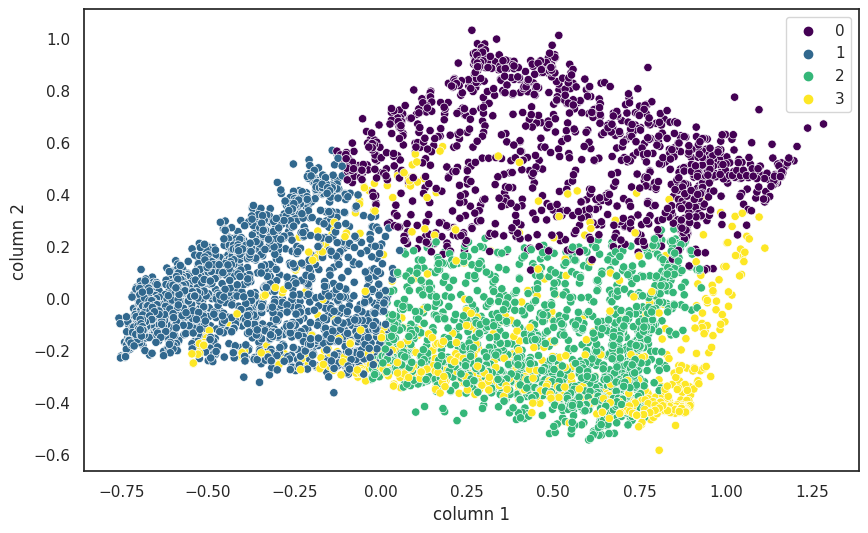

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df.iloc[:, 0], y=pca_df.iloc[:, 1], hue=cluster_predictions, palette='viridis')

plt.xlabel("column 1")
plt.ylabel("column 2")
plt.show()


Comparing to image plotted assignment 2, we can see the clusters more clear, the points are mixed but we can split the clusters.
Next image is a cluster assignment 2, we notice that the points are all mixed up

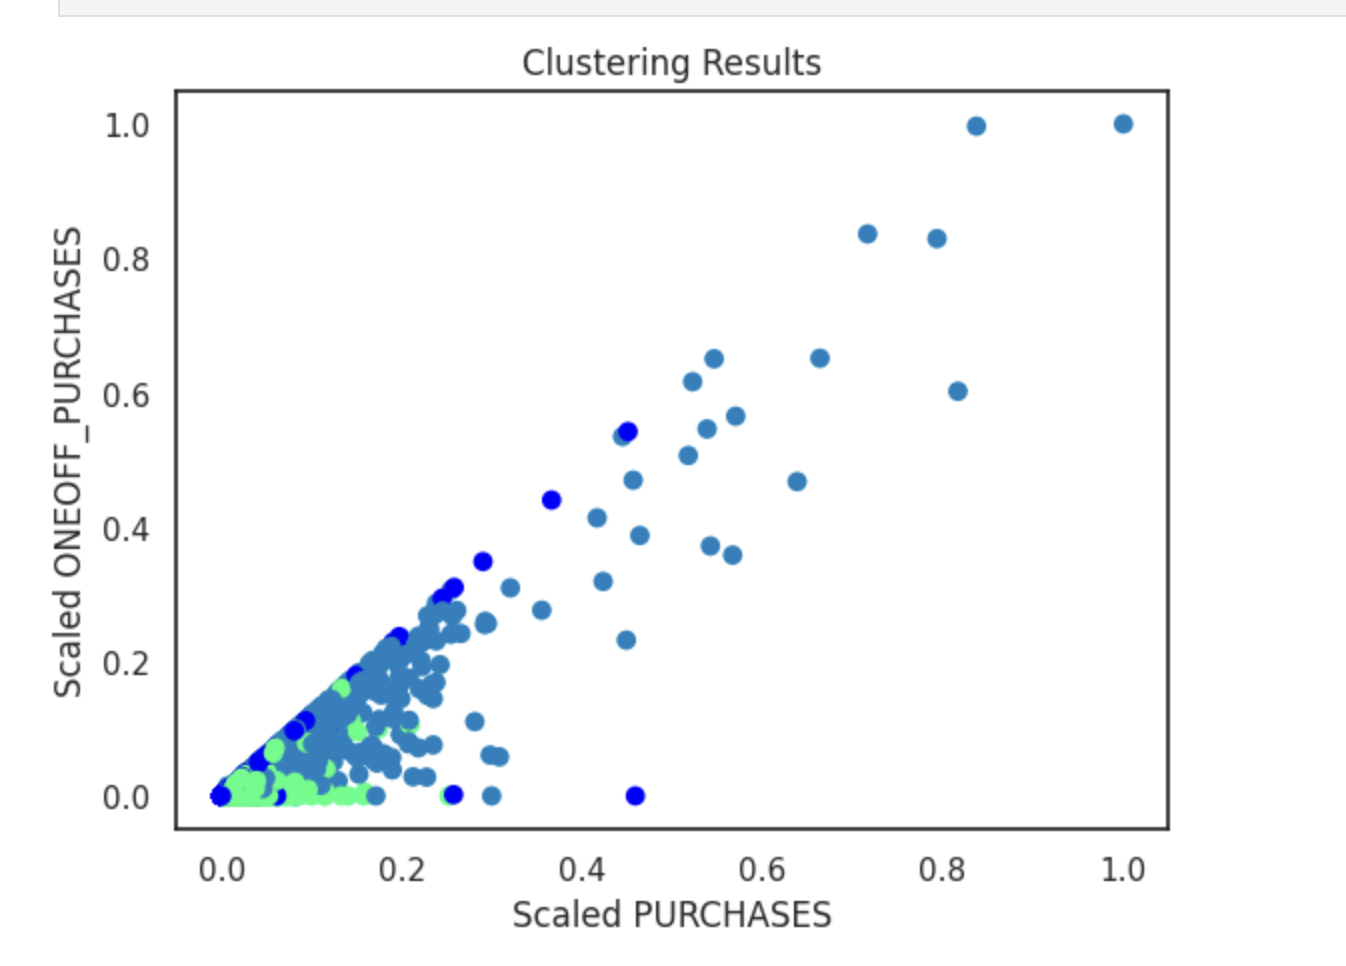

## Question 4- b)
Generate a histogram that shows the number of elements in each cluster. Use markdown to comment on the histogram.



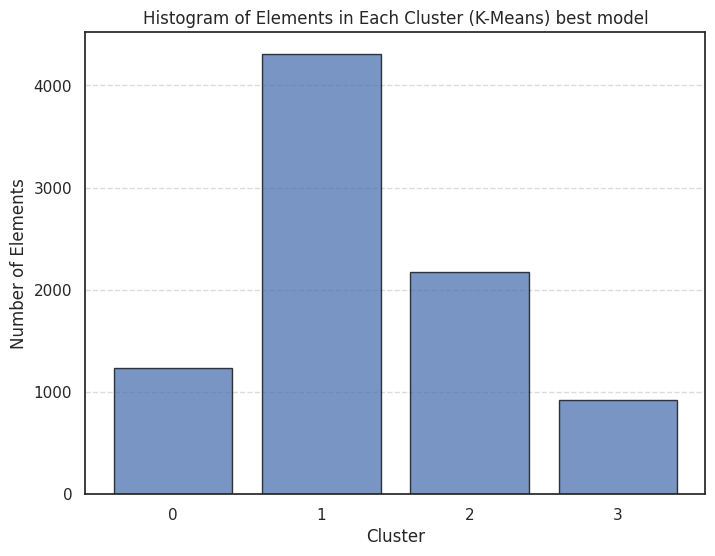

In [52]:
# Create a histogram
plt.figure(figsize=(8, 6))
plt.bar(unique_clusters, cluster_counts,  alpha=0.75, edgecolor='black')
plt.xlabel("Cluster")
plt.ylabel("Number of Elements")
plt.title("Histogram of Elements in Each Cluster (K-Means) best model")
plt.xticks(unique_clusters)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



## Question 4- c)
Create a separate dataframe from the untransformed data for each cluster. Use pandas.DataFrame.describe to describe each cluster.


In [67]:
# Add the cluster labels to the untransformed data
df['Cluster'] = cluster_predictions

# Create separate DataFrames for each cluster
cluster_dataframes = {}
for cluster in df['Cluster'].unique():
    cluster_dataframes[cluster] = df[df['Cluster'] == cluster].drop('Cluster', axis=1)

# Describe each cluster
cluster_descriptions = {}
for cluster, cluster_df in cluster_dataframes.items():
    cluster_descriptions[cluster] = cluster_df.describe()

# Remove the 'Cluster' column from the original dataframe
df.drop('Cluster', axis=1, inplace=True)


In [64]:
cluster_0_description = cluster_descriptions[0]
print("Cluster 0 Description:")
print(cluster_0_description)


Cluster 0 Description:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1237.000000        1237.000000   1237.000000       1237.000000   
mean    1912.291066           0.979982   3278.314689       2501.815562   
std     2423.247439           0.071187   4301.158658       3506.623890   
min        0.413670           0.181818      8.400000          8.400000   
25%      302.142293           1.000000   1078.890000        833.290000   
50%      952.379745           1.000000   2118.540000       1538.970000   
75%     2600.500163           1.000000   3873.500000       2788.810000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1237.000000   1237.000000          1237.000000   
mean               776.499127    669.936453             0.901628   
std               1388.263218   2067.142688             0.136985   
min                  0.000000      0.0

**CLUSTER 0**

BALANCE: These customers have different amounts of balance, some have very little, others have high card balances

SHOPPING: Consumer habits are very different, some buy a little and some a lot

MONEY ADVANCE: some request money credit in varying amounts

CREDIT LIMIT: Limits also vary greatly


PERMANENCE: Most of these customers have been using their credit cards for a year.

In short, this cluster has varied customers

In [61]:
cluster_1_description = cluster_descriptions[1]
print("Cluster 1 Description:")
print(cluster_1_description)


Cluster 1 Description:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4305.000000        4305.000000   4305.000000       4305.000000   
mean    1835.130361           0.868331    291.924774        234.187377   
std     2080.904125           0.234272    846.392635        729.808147   
min        0.000000           0.000000      0.000000          0.000000   
25%      380.351858           0.818182      0.000000          0.000000   
50%     1173.880289           1.000000     45.650000          0.000000   
75%     2468.506177           1.000000    303.240000        210.620000   
max    16304.889250           1.000000  22500.000000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4305.000000   4305.000000          4305.000000   
mean                57.892111   1424.315642             0.138060   
std                422.994979   2310.580265             0.167271   
min                  0.000000      0.0

**CLUSTER 1**

BALANCE: These customers average balance of $1,835, ranging from $0 to $16,305

PURCHASES: These customers make purchases worth $292, ranging from $0 to $22,500.

Cash advance: some request cash credit in varying amounts

CREDIT LIMIT: Limits also vary greatly


PERMANENCE: Most of these customers have already been using a credit card for a year.

In short, this cluster has customers with a low purchasing frequency, they make more cash advances than purchases. Few pay the full payment, they tend to make the minimum payment and buy little.

In [63]:
cluster_2_description = cluster_descriptions[2]
print("Cluster 2 Description:")
print(cluster_2_description)


Cluster 2 Description:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   2172.000000        2172.000000   2172.000000       2172.000000   
mean    1592.485679           0.944687   1190.271828        381.380331   
std     2102.270231           0.147320   1395.507376        747.403160   
min        0.000000           0.000000     12.000000          0.000000   
25%      171.135520           1.000000    361.865000          0.000000   
50%      934.394712           1.000000    700.425000         27.250000   
75%     2018.444610           1.000000   1521.250000        451.285000   
max    18495.558550           1.000000  15108.470000       9805.730000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             2172.000000   2172.000000          2172.000000   
mean               809.490760    705.028614             0.879320   
std                972.266584   1955.094652             0.153852   
min                 12.000000      0.0

**CLUSTER 2**

BALANCE: The average balance is $1,592, ranging from $0 to $18,496.

PURCHASES: On average, customers in this cluster make purchases worth $1,190, from US$12 to US$15,108. They tend to make more purchases in installments.

Overall, customers in this cluster appear to have greater purchasing activity, make installment purchases more frequently and do not rely heavily on cash advances. They have a higher credit limit and make payments more consistently.


Cash advance frequency is relatively low, indicating that these customers do not frequently use the cash advance feature.
Average full payment percentage is low

The average payment made by customers in this cluster is $1,592. The majority of customers in this cluster have had their credit cards for 12 months. (PRC_FULL_PAYMENT average of 0.065), indicating that they do not make full payments regularly.

In [65]:
cluster_3_description = cluster_descriptions[3]
print("Cluster 3 Description:")
print(cluster_3_description)


Cluster 3 Description:
           BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   922.000000         922.000000    922.000000        922.000000   
mean    112.319983           0.788787   1039.441551        317.405889   
std     182.857155           0.244678   1367.407886        783.677127   
min       0.074724           0.090909      0.000000          0.000000   
25%      24.537700           0.636364    278.170000          0.000000   
50%      55.856316           0.909091    575.510000          0.000000   
75%     124.369141           1.000000   1257.490000        181.500000   
max    1565.982050           1.000000  14604.870000       6965.060000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              922.000000    922.000000           922.000000   
mean               722.815466    101.938653             0.720077   
std               1002.046788    708.526189             0.285124   
min                  0.000000      0.000000    

**CLUSTER 3**

BALANCE: Customers have an average balance of $112, with balances ranging from $0.07 to $1,565

PURCHASES: On average, customers in this cluster make purchases worth $1,039, ranging from US$0 to US$14,605.

Customers in this cluster have a moderate purchase frequency, with an average frequency of 0.72. They tend to make more purchases in installments than single purchases. The average one-time purchase is $317 and the average installment purchase is $723.

these customers rarely use the cash advance feature.
Customers in this cluster have a high percentage of full payments (average PRC_FULL_PAYMENT of 0.814), indicating that they often pay their balances in full.
Overall, customers in this group appear to be conservative consumers, focusing on timely payments, high credit card ownership, and minimal use of cash advances. They make more frequent purchases, but of lower value compared to other clusters.

## Question 4- d)
Provide a written conclusion to describe each group of customers to the marketing strategy team.


**Cluster 0:**
It's a diverse group, in this case maybe create some marketing with some discounts in different areas to understand more about their preferences.

**Cluster 1:**
Targeted promotions and incentives to encourage them to make more purchases. Highlight the benefits of using their credit card for regular transactions.
Also, explain about the value of regular payments in order to increase their limit.


**Cluster 2:**
Maybe implement some reward program, offer discount or points for paying full balance.

**Cluster 3:**
Cahsback is a good option because they already are a good clients, with cashback they will buy more.

